# Kenya Crop Points

**Author**: Ivan Zvonkov

**Last modified**: Mar 12, 2024

**Description**: Loads in Kenya points classified as crop and analyzes admin zones

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [180]:
df = pd.read_csv("../../data/Kenya_crops_w_admin_zones.csv")

/var/folders/1v/87y9n_d5143c_6cp072v3b1c0000gn/T/ipykernel_88920/2119012729.py:1: DtypeWarning: Columns (11,14,15,16,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/Kenya_crops_w_admin_zones.csv")


## 1. Crop Breakdown

Crops from https://ipad.fas.usda.gov/countrysummary/images/KE/cropcalendar/eafrica_ke_calendar.png

<img src="https://ipad.fas.usda.gov/countrysummary/images/KE/cropcalendar/eafrica_ke_calendar.png" />

<img src="attachment:a2b04571-6603-4705-a688-abe777a4d103.png"  width="400"/>

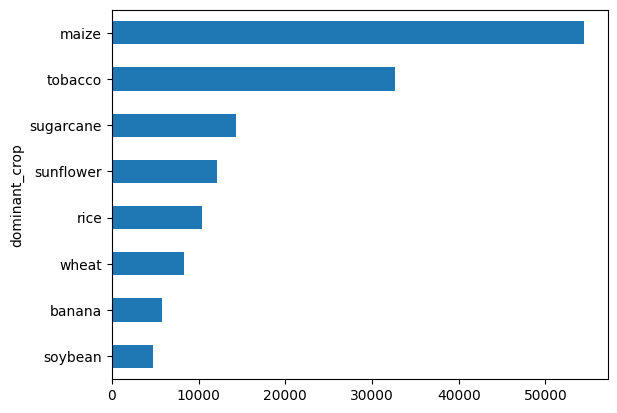

In [171]:
# Predicted crops
df["dominant_crop"].value_counts().sort_values().plot.barh();
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + 0.15))

## 2. Crop Prediction Justification

If points will be analyzed, default is to keep the crop unless evidence that there are many misclassifications.

If points will not be analyzed, default is to discard crop unless evidence that there are many correct classifications.

- **Maize**: Matches FAS, good results per `notebooks/deployment_1_crop_prediction_analysis`, keeping ✅
- **Tobacco**: Not included in FAS 🚩, bad results per error analysis [here](https://docs.google.com/spreadsheets/d/1SErjKizF6fM_48p8onQwJXWFr07rbqL2ToKh87TvDe8/edit#gid=0) 🚩, discarding ❌
- **Sugarcane**: Not included in FAS 🚩, good results per `notebooks/deployment_1_crop_prediction_analysis`, keeping ✅
- **Sunflower**: Not included in FAS 🚩, bad results per `notebooks/deployment_1_crop_prediction_analysis` 🚩, discarding ❌
- **Rice**: Matches FAS, questionable results in other countries per `notebooks/deployment_1_crop_prediction_analysis` 🚩, discarding ❌
- **Wheat**: Matches FAS, not analyzed in error analysis, keeping ✅
- **Banana**: Not included in FAS 🚩, good results in Uganda per `notebooks/deployment_1_crop_prediction_analysis`, keeping ✅
- **Soybean**: Not included in FAS 🚩, good results in USA per `notebooks/deployment_1_crop_prediction_analysis`, keeping ✅

## 2a. Crop Analysis 

If time permits error analysis on crop classifications.

For each crop:
1. Randomly sample 5-20 crop classificaitons
2. Download photos for crop classifications
3. Visually assess their accuracy (are all of them right, some of them right, none of them right).


## 3. Discarding Predictions

In [183]:
points_before = len(df)

In [184]:
df["dominant_crop"].unique()

array(['banana', 'tobacco', 'wheat', 'maize', 'sugarcane', 'sunflower',
       'rice', 'soybean'], dtype=object)

In [185]:
crops_to_keep = ["banana", "wheat", "maize", "sugarcane", "soybean"]

In [186]:
df = df[df["dominant_crop"].isin(crops_to_keep)].copy()

In [187]:
remaining = len(df)
print(f"Records remaining: {remaining}")
print(f"Records discarded: {points_before - remaining}")

Records remaining: 87683
Records discarded: 55136


## 4. Per Admin Zone Breakdown

### 4.1 Admin 1 Zone

Would be valuable to get local expetise here. If does not match local expectations eliminate.

<img src="attachment:1bcfa317-c048-483c-b22b-930f033041c3.png" width="500px"/>

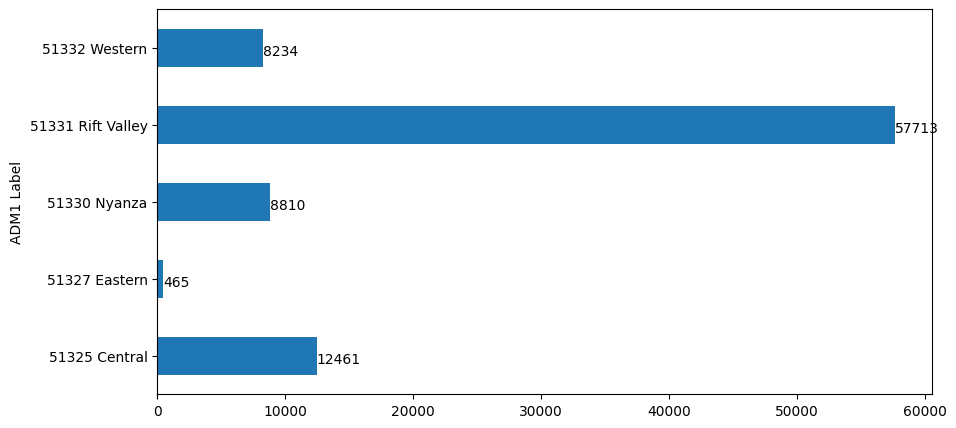

In [193]:
# Admin 1 Distribution
ax = df["ADM1 Label"].value_counts().sort_index().plot(kind="barh", figsize=(10,5));
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + 0.15))

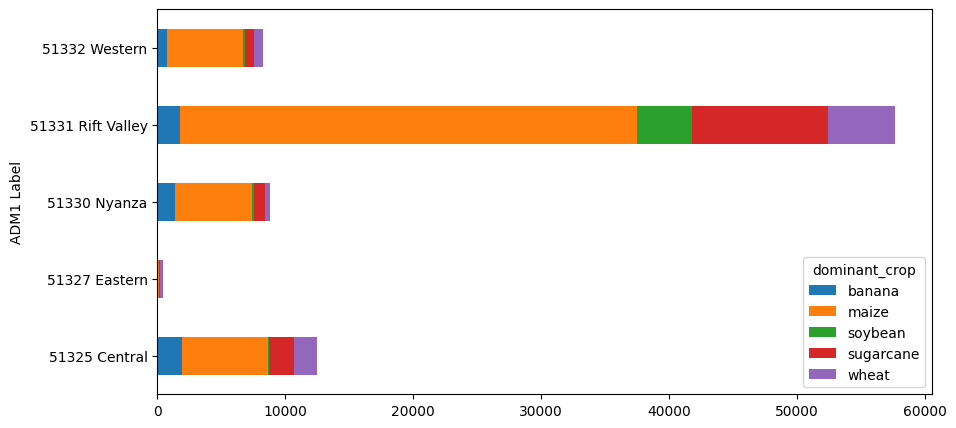

In [192]:
# Admin 1 crop distribution
value_counts = df.groupby(["ADM1 Label", "dominant_crop"]).size().reset_index(name='count')
result_df = value_counts.pivot_table(index='ADM1 Label', columns='dominant_crop', values='count', fill_value=0)
result_df.sort_index().plot.barh(rot=0, stacked=True, figsize=(10,5));

### 4.2 Admin 2 Break Down

Would be useful to have local expertise or another source to verify distribution.

Not normalized across x axis, to normalize uncomment line 4 in this cell


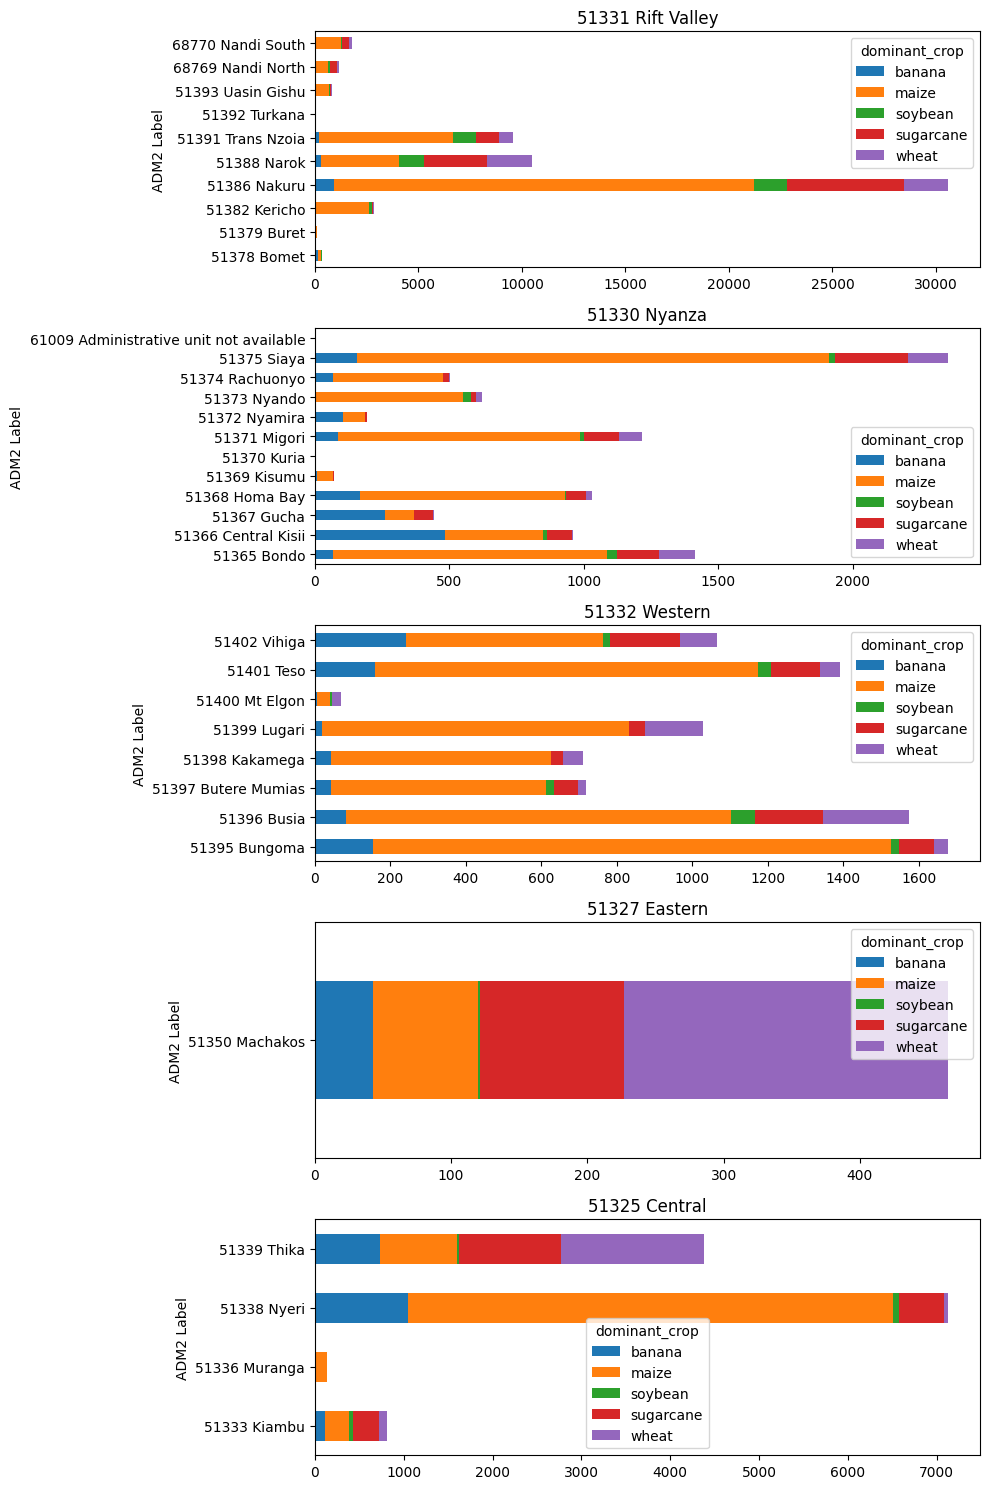

In [199]:
fig, axes = plt.subplots(5, figsize=(10,15))
for i, adm1_zone in enumerate(df["ADM1 Label"].unique()):
    axes[i].set_title(adm1_zone)
    #axes[i].set_xlim(0, 50000) 
    df_ADM1 = df[df["ADM1 Label"] == adm1_zone]
    value_counts = df_ADM1.groupby(["ADM2 Label", "dominant_crop"]).size().reset_index(name='count')
    result_df = value_counts.pivot_table(index='ADM2 Label', columns='dominant_crop', values='count', fill_value=0)
    result_df.sort_index().plot.barh(rot=0, stacked=True, ax=axes[i]);

print("Not normalized across x axis, to normalize uncomment line 4 in this cell")
fig.tight_layout()
plt.show()

In [201]:
df.to_csv("../data/Kenya_crops_w_admin_zones_CLEAN.csv", index=False)